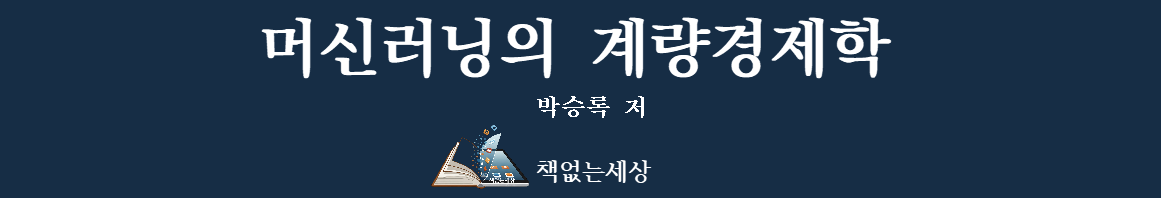

# Part 8: 머신러닝의 계량경제학

## Chapter 2: 머신러닝 분석 절차 살펴보기

In [1]:
# 작업공간(working directory)지정  
import os  
os.chdir("X:/Econometrics_with_ML")
os.getcwd()

'X:\\Econometrics_with_ML'

In [10]:
# 본서에서 사용되는 모든 Library 불러오기 
exec(open('Functions/Machine Learning_Econometrics_Lib.py').read())

In [2]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

from joblib import dump
from joblib import load
from matplotlib import pyplot
from pandas import read_csv
from pandas.plotting import scatter_matrix
from pickle import dump
from pickle import load
from scipy.stats import uniform
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold

from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings("ignore")

# Korean Fonts
mpl.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False)


### 나. 머신러닝에서 탐색적 데이터 분석(EDA)

In [11]:
# 피마 인디언 당뇨병 데이터베이스
# https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

# 데이터 읽어오기
filename = "Data/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
peek = data.head(20)
print(peek)

shape = data.shape
print(shape)

types = data.dtypes
print(types)

#set_option('display.width', 100)
pd.set_option('display.max_rows', 10)

#set_option('precision', 3)
pd.set_option('display.precision', 3)

# 단순기술 통계량
description = data.describe()
print(description)

class_counts = data.groupby('class').size()
print(class_counts)

# 상관계수
correlations = data.corr(method='pearson')
print(correlations)

# 왜도
skew = data.skew()
print(skew)

    preg  plas  pres  skin  test  mass   pedi  age  class
0      6   148    72    35     0  33.6  0.627   50      1
1      1    85    66    29     0  26.6  0.351   31      0
2      8   183    64     0     0  23.3  0.672   32      1
3      1    89    66    23    94  28.1  0.167   21      0
4      0   137    40    35   168  43.1  2.288   33      1
..   ...   ...   ...   ...   ...   ...    ...  ...    ...
15     7   100     0     0     0  30.0  0.484   32      1
16     0   118    84    47   230  45.8  0.551   31      1
17     7   107    74     0     0  29.6  0.254   31      1
18     1   103    30    38    83  43.3  0.183   33      0
19     1   115    70    30    96  34.6  0.529   32      1

[20 rows x 9 columns]
(768, 9)
preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object
          preg     plas     pres     skin     test     mass     pedi      age  \
count  768.000  768.000 

## 3. 데이터의 시각화 

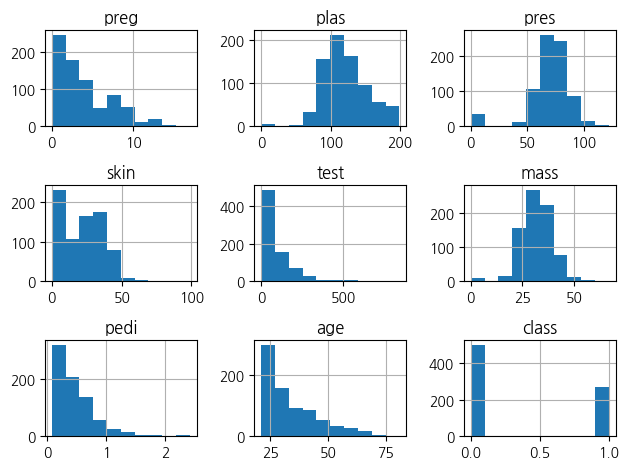

In [12]:
# 데이터의 히스토그램
data.hist()
pyplot.tight_layout()
pyplot.show()

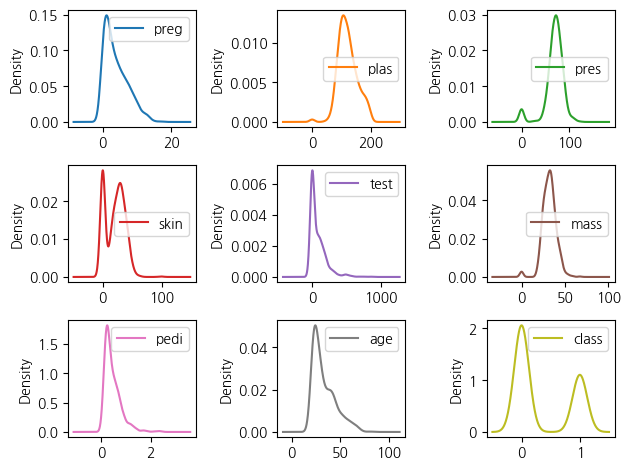

In [13]:
# 데이터의 KDE
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
pyplot.tight_layout()
pyplot.show()

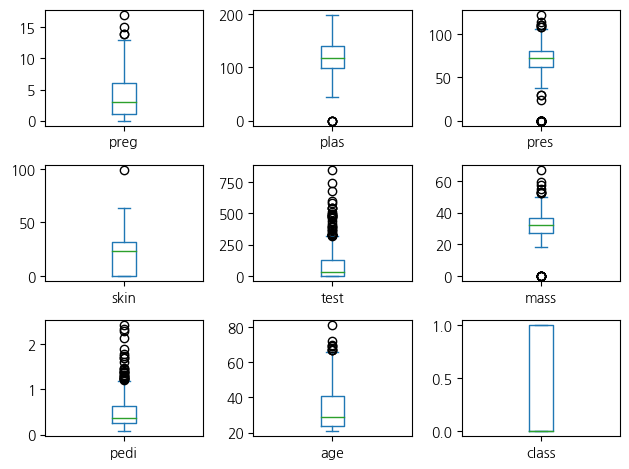

In [14]:
# 데이터의 박스 다이어그램
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.tight_layout()
pyplot.show()

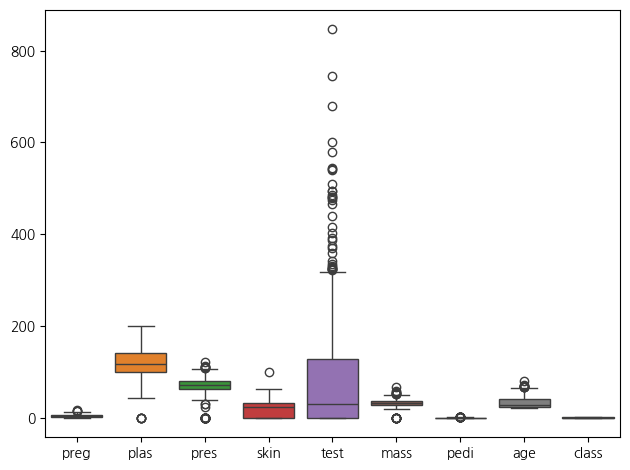

In [15]:
sns.boxplot(data=data)
pyplot.tight_layout()
pyplot.show()

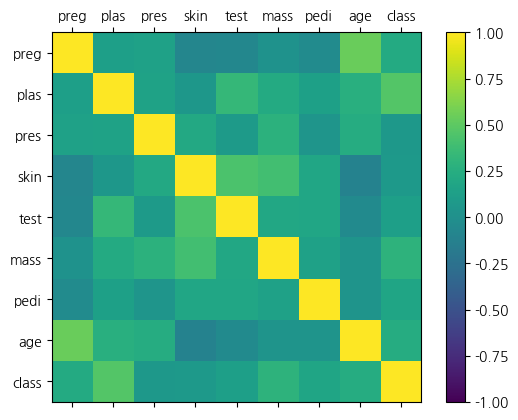

In [16]:
correlations = data.corr()
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

array([[<Axes: xlabel='preg', ylabel='preg'>,
        <Axes: xlabel='plas', ylabel='preg'>,
        <Axes: xlabel='pres', ylabel='preg'>,
        <Axes: xlabel='skin', ylabel='preg'>,
        <Axes: xlabel='test', ylabel='preg'>,
        <Axes: xlabel='mass', ylabel='preg'>,
        <Axes: xlabel='pedi', ylabel='preg'>,
        <Axes: xlabel='age', ylabel='preg'>,
        <Axes: xlabel='class', ylabel='preg'>],
       [<Axes: xlabel='preg', ylabel='plas'>,
        <Axes: xlabel='plas', ylabel='plas'>,
        <Axes: xlabel='pres', ylabel='plas'>,
        <Axes: xlabel='skin', ylabel='plas'>,
        <Axes: xlabel='test', ylabel='plas'>,
        <Axes: xlabel='mass', ylabel='plas'>,
        <Axes: xlabel='pedi', ylabel='plas'>,
        <Axes: xlabel='age', ylabel='plas'>,
        <Axes: xlabel='class', ylabel='plas'>],
       [<Axes: xlabel='preg', ylabel='pres'>,
        <Axes: xlabel='plas', ylabel='pres'>,
        <Axes: xlabel='pres', ylabel='pres'>,
        <Axes: xlabel='skin', yl

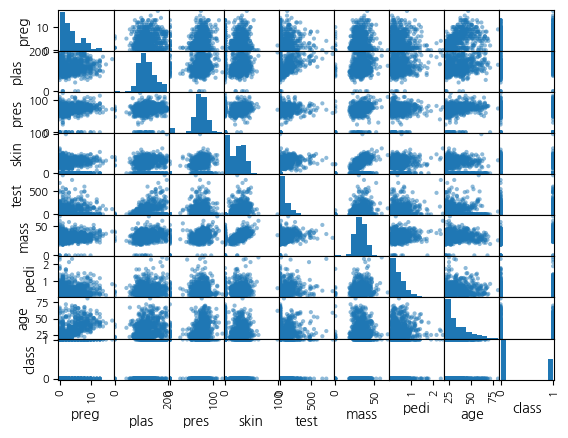

In [17]:
scatter_matrix(data)

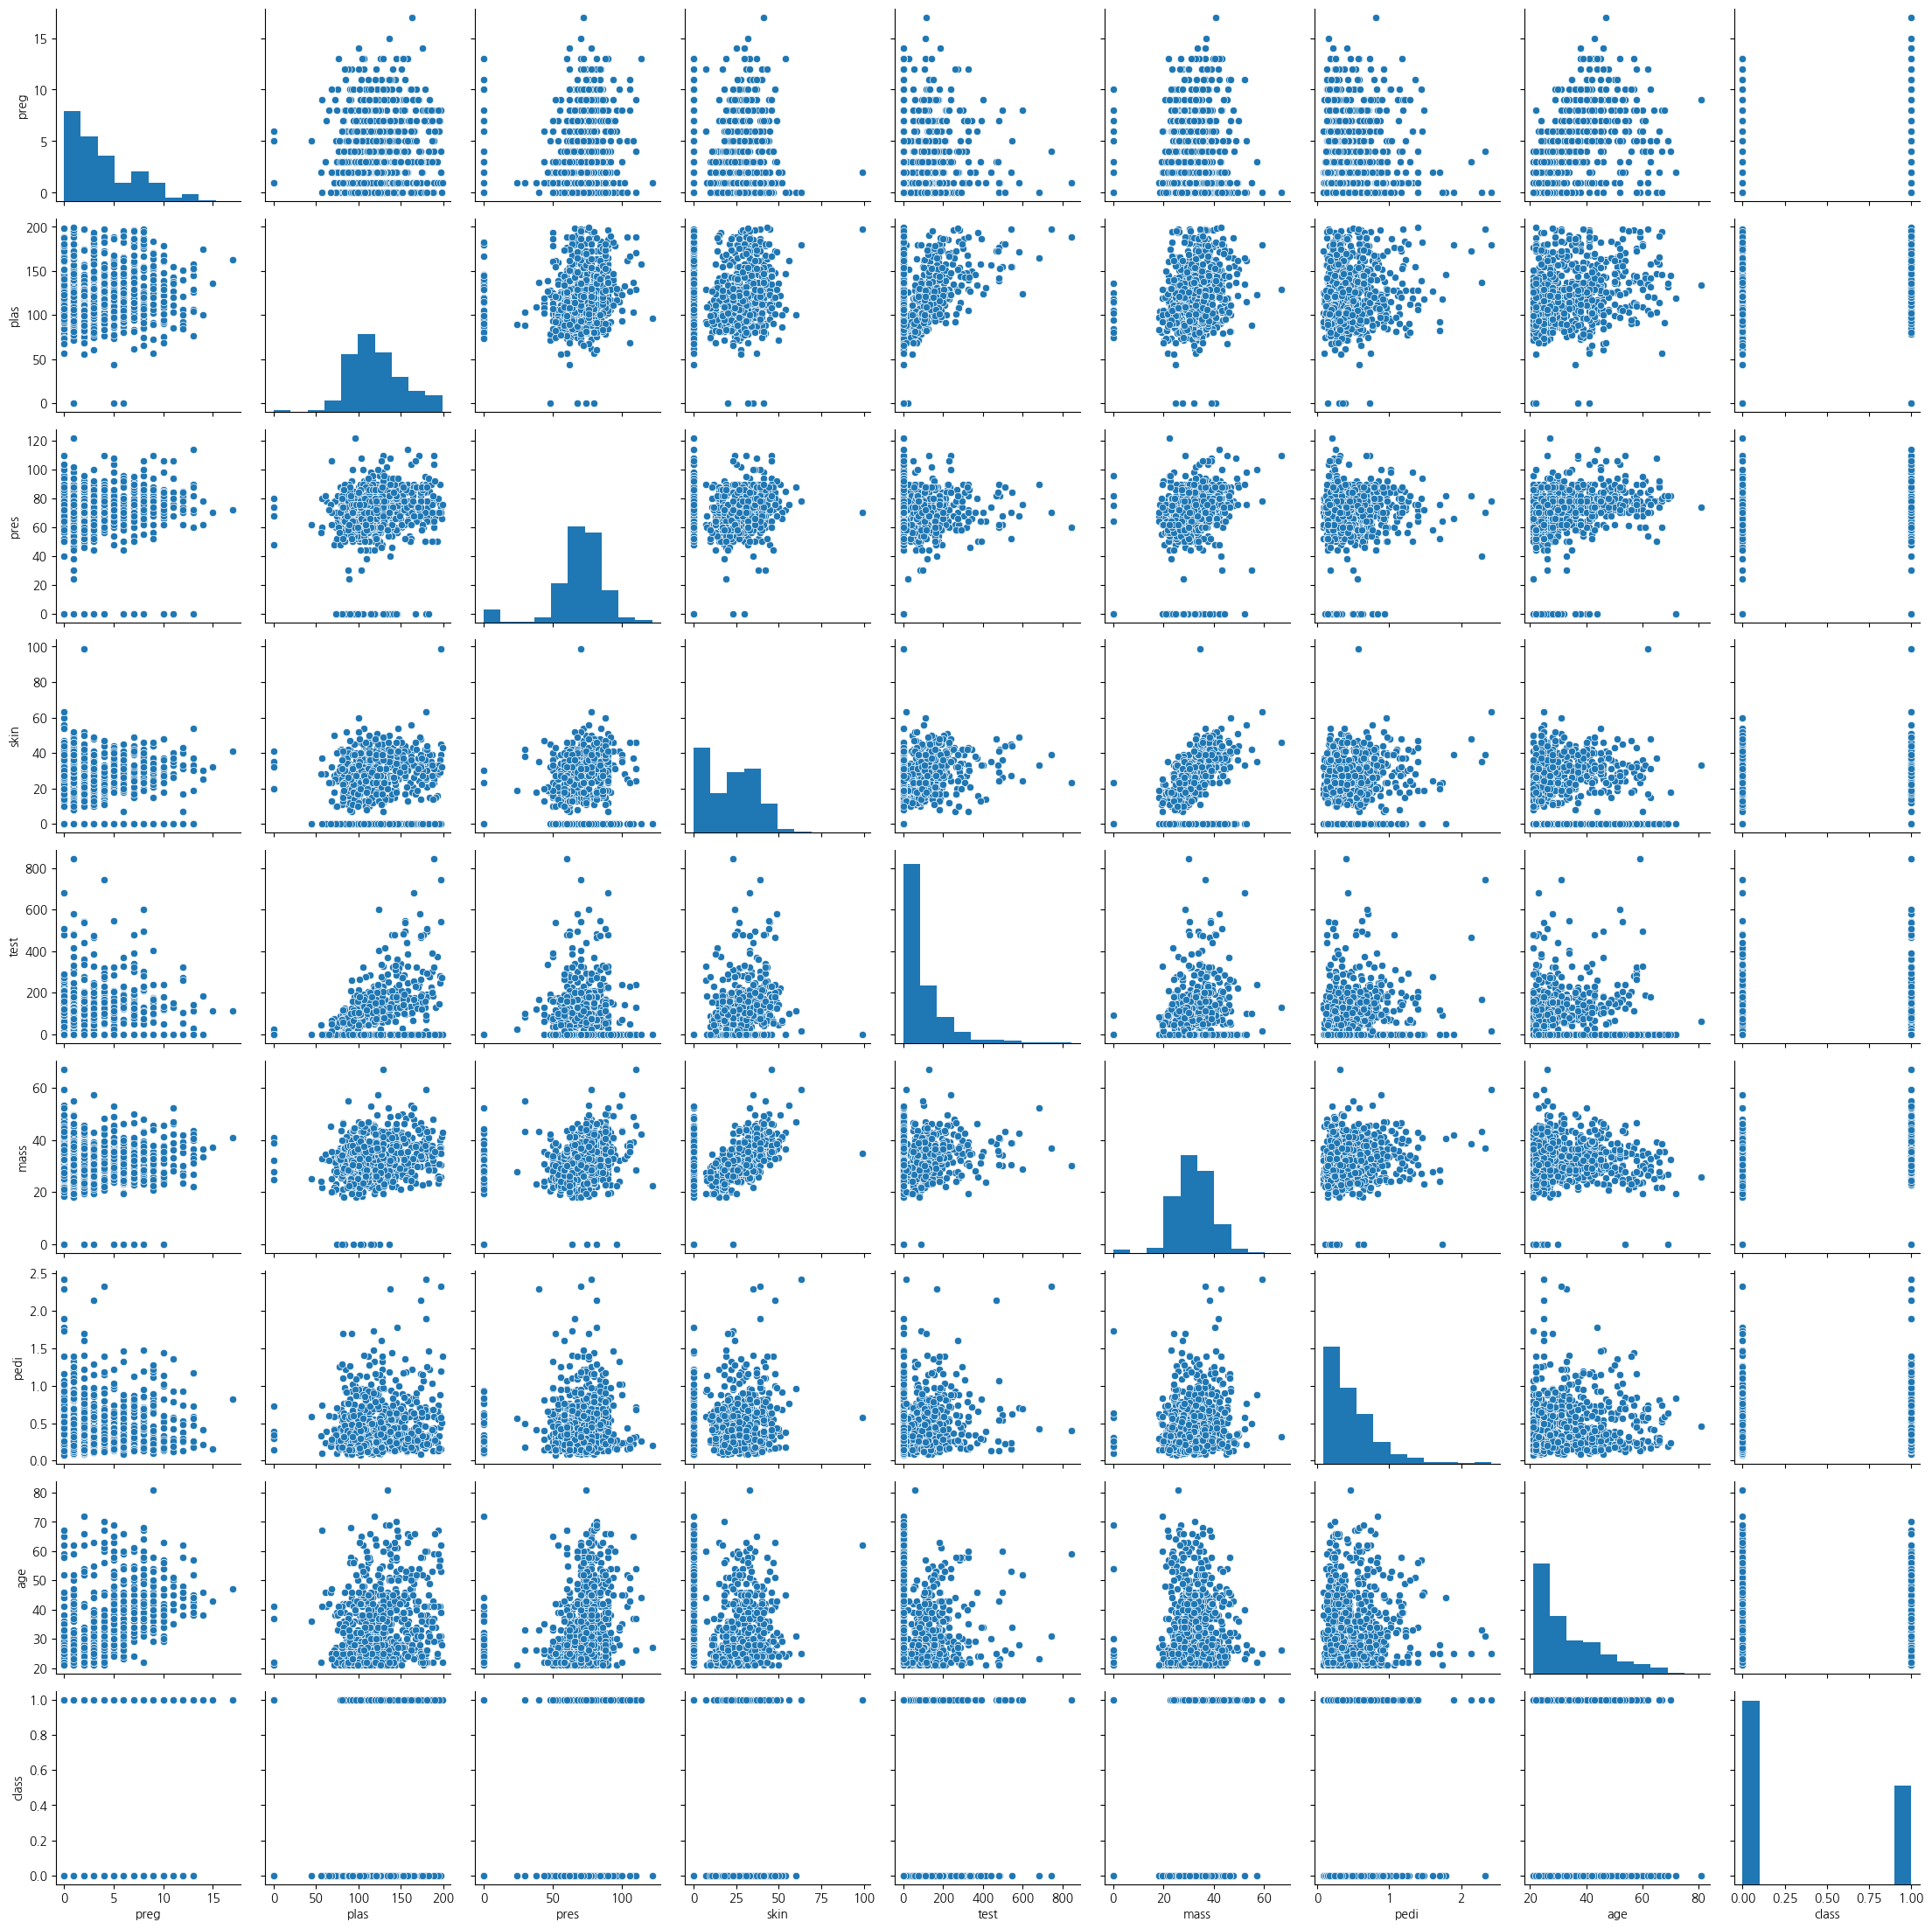

In [18]:
pairgrid = sns.PairGrid(data=data)
pairgrid = pairgrid.map_offdiag(sns.scatterplot)
pairgrid = pairgrid.map_diag(pyplot.hist)


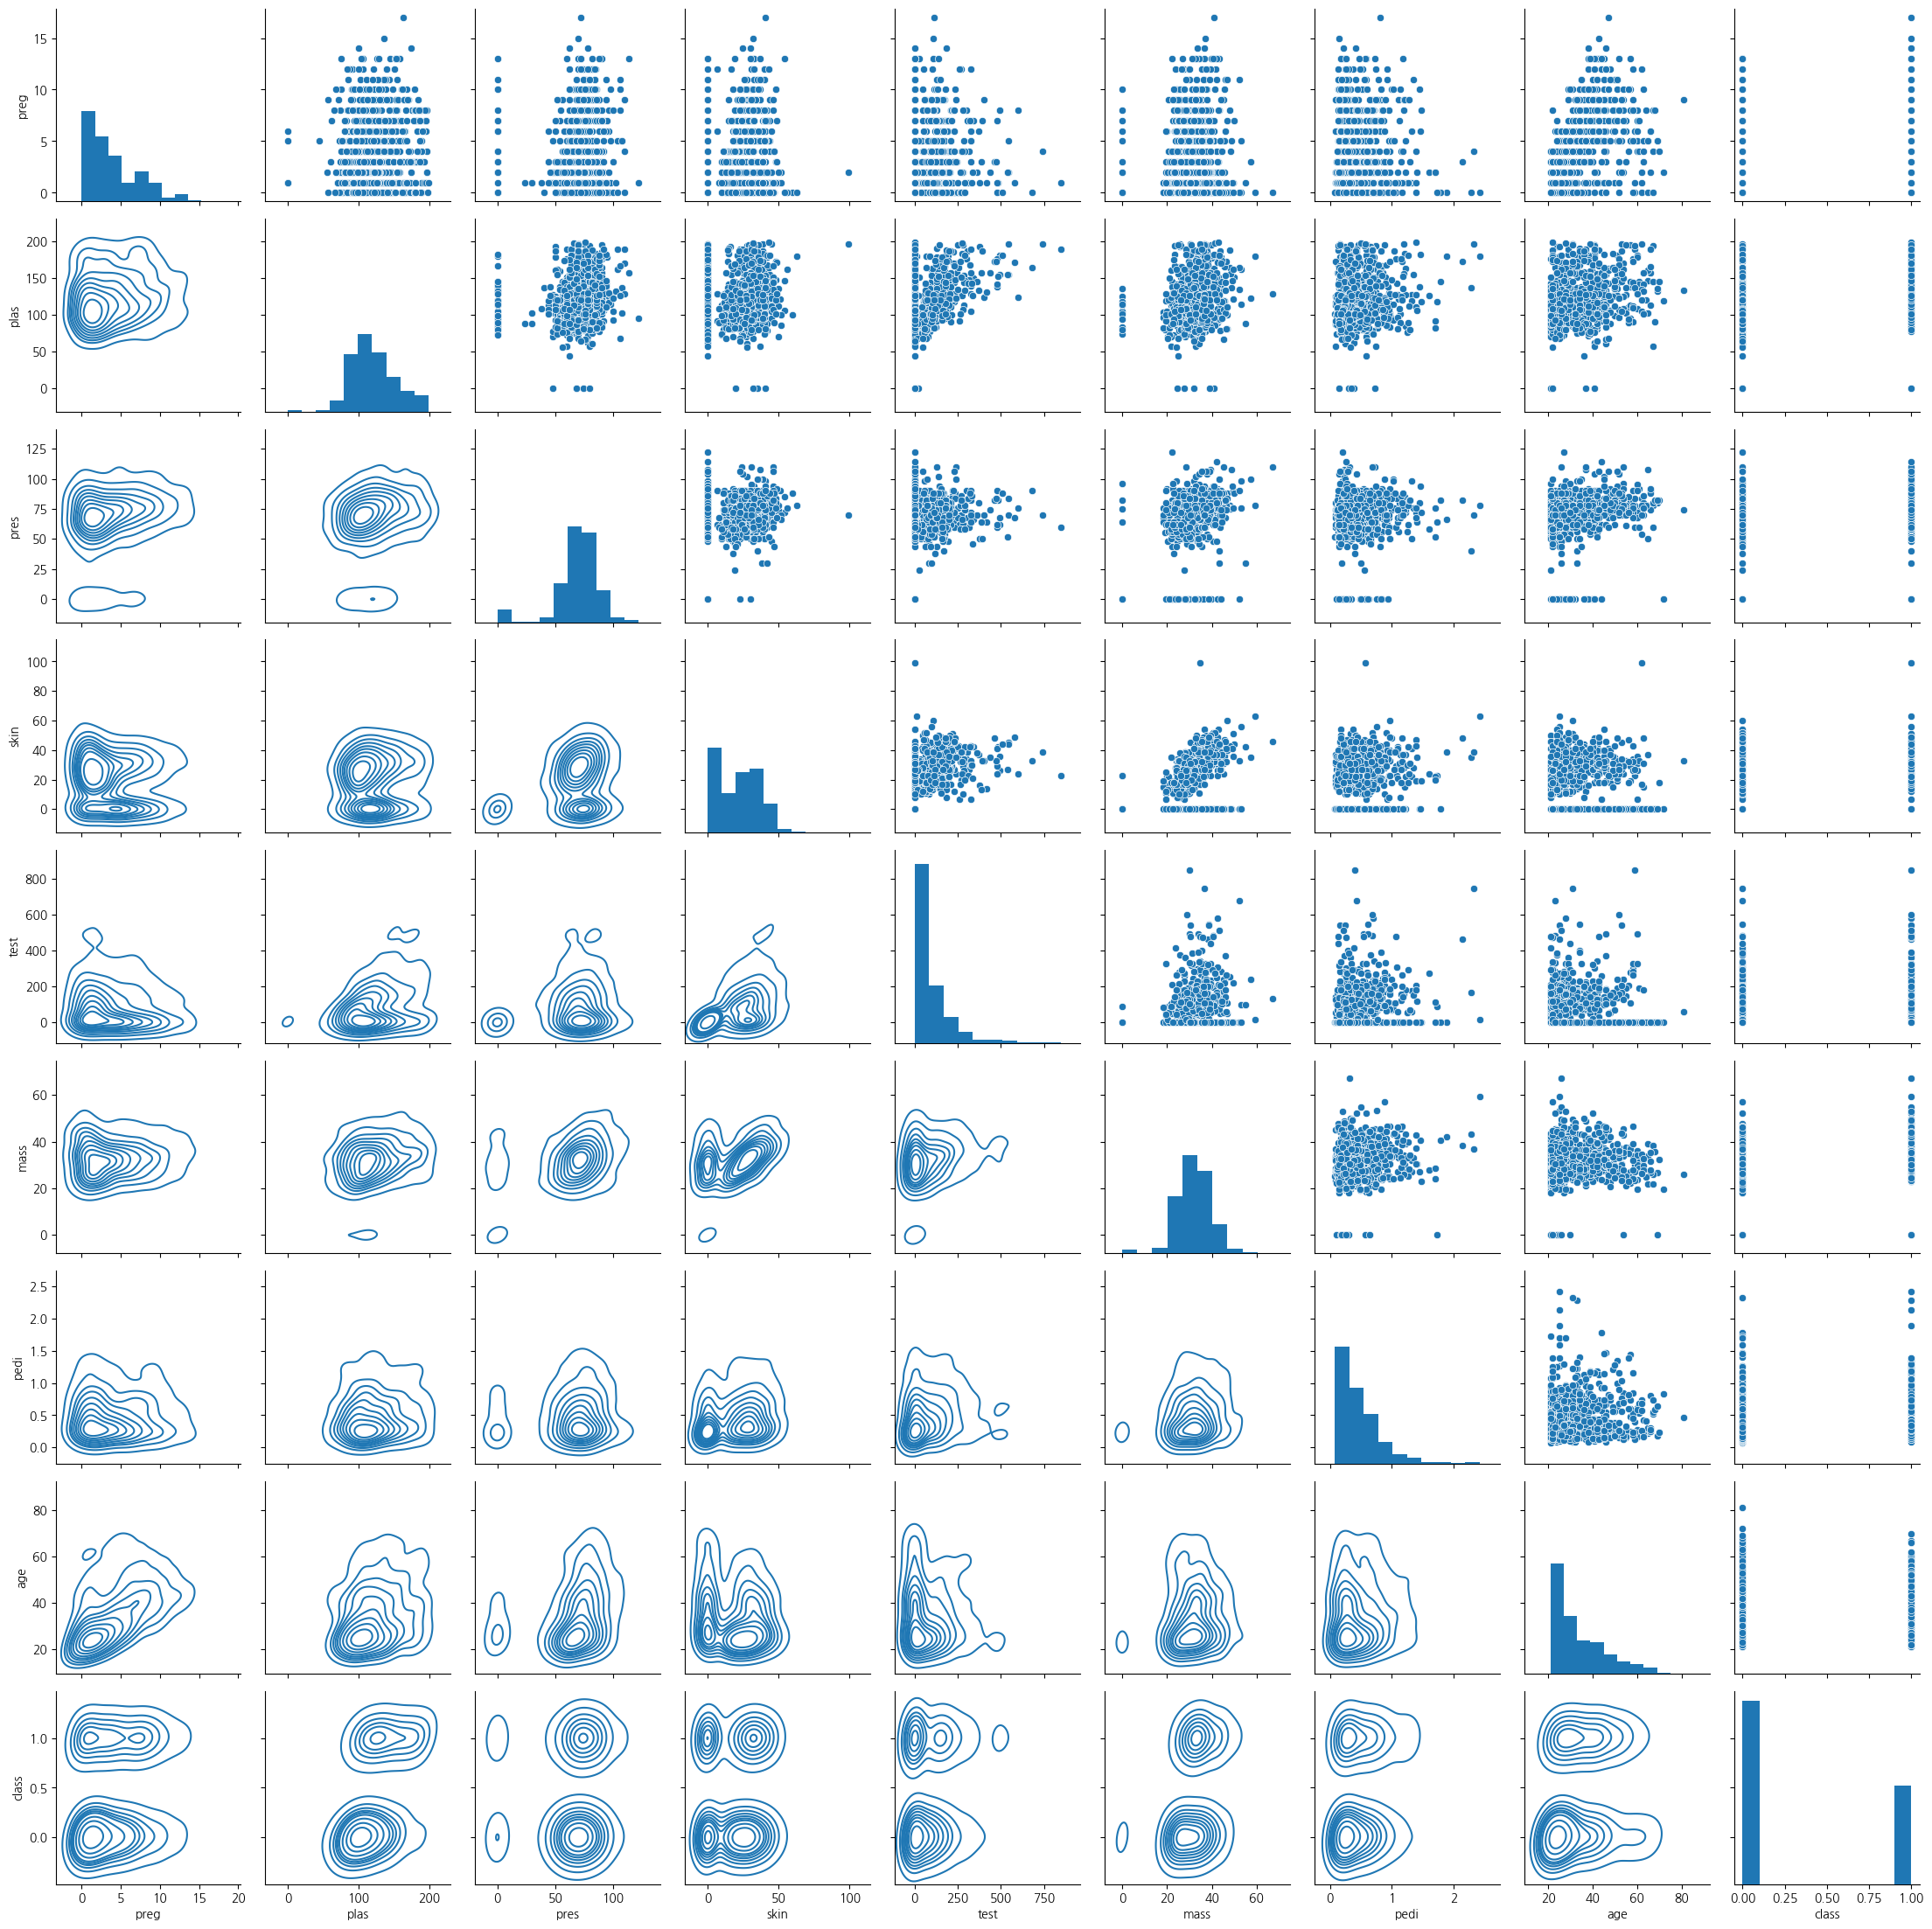

In [19]:
pairgrid = sns.PairGrid(data=data)
pairgrid = pairgrid.map_upper(sns.scatterplot)
pairgrid = pairgrid.map_diag(pyplot.hist)
pairgrid = pairgrid.map_lower(sns.kdeplot)


### 4. 머신러닝을 위한 데이터의 전처리 

In [20]:
# 종속변수와 설명변수의 구분
df_array = data.values
y = df_array[:, 8]
X = df_array[:, 0:8]
print(y, X)

[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1.

In [21]:
#  최소-최대 스케일링(Min-Max Scaling)
scaler = MinMaxScaler(feature_range=(0, 1))
minmax_X = scaler.fit_transform(X)
print(minmax_X)

[[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462   0.07130658 0.15      ]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.11571307 0.43333333]
 [0.05882353 0.46733668 0.57377049 ... 0.45305514 0.10119556 0.03333333]]


In [22]:
# 표준화(Standardization)
scaler = StandardScaler().fit(X)
stand_X = scaler.transform(X)
print(stand_X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [23]:
# 강건 스케일링(Robust Scaling)
scaler = RobustScaler().fit(X)
Robust_X = scaler.transform(X)
print(Robust_X)

[[ 0.6         0.75151515  0.         ...  0.17204301  0.66535948
   1.23529412]
 [-0.4        -0.77575758 -0.33333333 ... -0.58064516 -0.05620915
   0.11764706]
 [ 1.          1.6        -0.44444444 ... -0.93548387  0.78300654
   0.17647059]
 ...
 [ 0.4         0.0969697   0.         ... -0.62365591 -0.33333333
   0.05882353]
 [-0.4         0.21818182 -0.66666667 ... -0.20430108 -0.06143791
   1.05882353]
 [-0.4        -0.58181818 -0.11111111 ... -0.17204301 -0.1503268
  -0.35294118]]


In [24]:
# 이진화(Binarization)print(normal_X )
binarizer = Binarizer(threshold=10.0).fit(X)
binary_X = binarizer.transform(X)
print(binary_X )

[[0. 1. 1. ... 1. 0. 1.]
 [0. 1. 1. ... 1. 0. 1.]
 [0. 1. 1. ... 1. 0. 1.]
 ...
 [0. 1. 1. ... 1. 0. 1.]
 [0. 1. 1. ... 1. 0. 1.]
 [0. 1. 1. ... 1. 0. 1.]]


In [25]:
# 정규화(Normalization)
scaler = Normalizer().fit(X)
normal_X = scaler.transform(X)
print(normal_X )

[[0.03355237 0.82762513 0.40262844 ... 0.18789327 0.00350622 0.27960308]
 [0.008424   0.71604034 0.55598426 ... 0.22407851 0.00295683 0.26114412]
 [0.04039768 0.92409698 0.32318146 ... 0.11765825 0.00339341 0.16159073]
 ...
 [0.02691539 0.65135243 0.38758161 ... 0.14103664 0.00131885 0.16149234]
 [0.00665306 0.83828547 0.39918356 ... 0.20025708 0.00232192 0.31269379]
 [0.00791454 0.73605211 0.55401772 ... 0.24060198 0.00249308 0.18203439]]


### 5. 머신러닝을 위한 변수 선택(특성 선택, feature selection)

In [26]:
# 종속변수와 설명변수의 구분
df_array = data.values
y = df_array[:, 8]
X = df_array[:, 0:8]
print(y, X)

[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1.

#### 1) 필터링(filtering) 방법

In [27]:
# 변수(특성)선택(feature extraction)
# 단변량 변수 선택방법
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, y)
print(fit.scores_)
print(fit.get_support())

features = fit.transform(X)
print(features)

[ 39.67022739 213.16175218   3.2569504    4.30438091  13.28110753
  71.7720721   23.8713002   46.14061124]
[ True  True False False False  True False  True]
[[  6.  148.   33.6  50. ]
 [  1.   85.   26.6  31. ]
 [  8.  183.   23.3  32. ]
 ...
 [  5.  121.   26.2  30. ]
 [  1.  126.   30.1  47. ]
 [  1.   93.   30.4  23. ]]


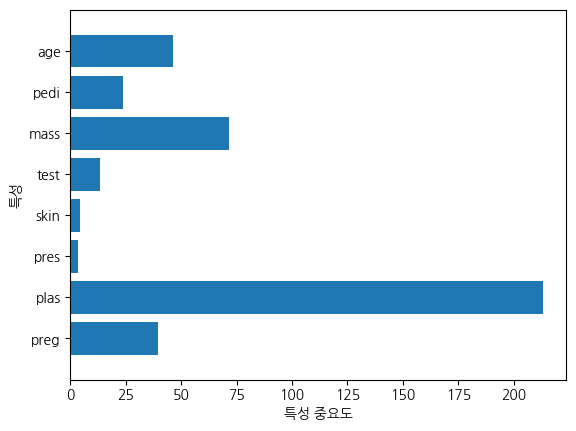

In [28]:
columns = 'preg plas pres skin test mass pedi age'
feature_name = columns.split()
n_features = X.shape[1]
pyplot.barh(np.arange(n_features), fit.scores_, align='center')
pyplot.yticks(np.arange(n_features), feature_name)
pyplot.xlabel('특성 중요도')
pyplot.ylabel('특성')
pyplot.ylim(-1, n_features)
pyplot.show()

In [29]:
# 분산 임계값을 이용하는 방법
selector = VarianceThreshold(threshold=0.2)
selector.fit(X)
print(selector.get_support())
X_new = selector.fit_transform(X)
print(X_new)

[ True  True  True  True  True  True False  True]
[[  6.  148.   72.  ...   0.   33.6  50. ]
 [  1.   85.   66.  ...   0.   26.6  31. ]
 [  8.  183.   64.  ...   0.   23.3  32. ]
 ...
 [  5.  121.   72.  ... 112.   26.2  30. ]
 [  1.  126.   60.  ...   0.   30.1  47. ]
 [  1.   93.   70.  ...   0.   30.4  23. ]]


#### 2) 래퍼(wrapper) 방법

In [30]:
# 축차적 변수선택(Recursive feature elimination)
model = LogisticRegression(solver='liblinear')
rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 4
Selected Features: [ True  True False False False  True  True False]
Feature Ranking: [1 1 2 4 5 1 1 3]


In [31]:
model = LogisticRegression(solver='liblinear')
rfecv = RFECV(model, cv=5)
fit = rfecv.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 4
Selected Features: [ True  True False False False  True  True False]
Feature Ranking: [1 1 2 4 5 1 1 3]


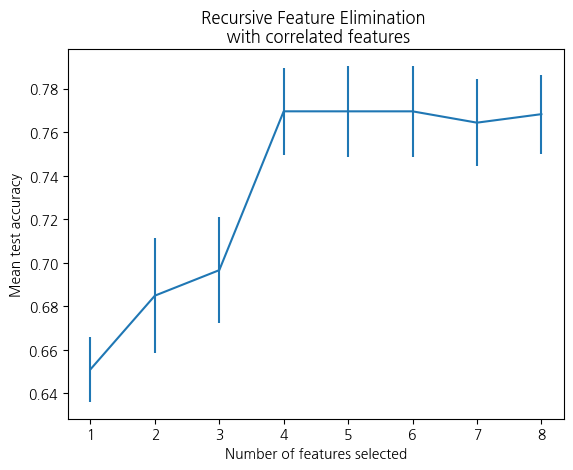

In [32]:
n_scores = len(rfecv.cv_results_["mean_test_score"])

pyplot.figure()
pyplot.xlabel("Number of features selected")
pyplot.ylabel("Mean test accuracy")
pyplot.errorbar(
    range(1, n_scores + 1),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
               )
pyplot.title("Recursive Feature Elimination \n with correlated features")
pyplot.show()

In [33]:
# L1-based feature selection
lsvc = LinearSVC(C=0.1, penalty="l1", dual=False).fit(X, y)
print(lsvc.coef_)

model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
print(X_new)
print(X_new.shape)


[[ 0.043818    0.01218147 -0.00546292  0.00033989 -0.00032522  0.02712289
   0.23128486  0.00441211]]
[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
(768, 8)


#### 3) 임베디드(embeded) 방법

In [34]:
model = Lasso(alpha=0.01)
model.fit(X, y)
print(model.coef_)

model = SelectFromModel(model, prefit=True)
X_new = model.transform(X)
print(X_new)
print(X_new.shape)


[ 0.01894381  0.00600006 -0.00231227  0.00035779 -0.00015158  0.01332546
  0.05012261  0.00287438]
[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
(768, 8)


In [35]:
# Tree-based feature selection
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
print(clf.feature_importances_)

[0.11125571 0.23997281 0.10150326 0.08209217 0.07219002 0.13674848
 0.11819474 0.13804281]


In [36]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape 
print(X_new)


[[148.   33.6  50. ]
 [ 85.   26.6  31. ]
 [183.   23.3  32. ]
 ...
 [121.   26.2  30. ]
 [126.   30.1  47. ]
 [ 93.   30.4  23. ]]


In [37]:
model = RandomForestClassifier()
model.fit(X, y)
#feature_importances = model.feature_importances_model = RandomForestClassifier()
#model.fit(X, y)
feature_importances = model.feature_importances_
print(feature_importances)

[0.08314045 0.26326189 0.0834429  0.06684015 0.07018322 0.17027205
 0.12526804 0.1375913 ]


In [38]:
model = SelectFromModel(model, prefit=True)
X_new = model.transform(X)
X_new.shape 
print(X_new)

[[148.     33.6     0.627  50.   ]
 [ 85.     26.6     0.351  31.   ]
 [183.     23.3     0.672  32.   ]
 ...
 [121.     26.2     0.245  30.   ]
 [126.     30.1     0.349  47.   ]
 [ 93.     30.4     0.315  23.   ]]


#### 4) 주성분 분석(PCA)

In [39]:
# 주요인 분석
pca = PCA(n_components=3)
fit = pca.fit(X)
print(fit.explained_variance_ratio_)
print(fit.components_)

[0.88854663 0.06159078 0.02579012]
[[-2.02176587e-03  9.78115765e-02  1.60930503e-02  6.07566861e-02
   9.93110844e-01  1.40108085e-02  5.37167919e-04 -3.56474430e-03]
 [-2.26488861e-02 -9.72210040e-01 -1.41909330e-01  5.78614699e-02
   9.46266913e-02 -4.69729766e-02 -8.16804621e-04 -1.40168181e-01]
 [-2.24649003e-02  1.43428710e-01 -9.22467192e-01 -3.07013055e-01
   2.09773019e-02 -1.32444542e-01 -6.39983017e-04 -1.25454310e-01]]


### 6. 머신러닝 알고리즘의 성능 평가를 위한 리샘플링

#### 나. 훈련 및 데이터세트로 분할 및 로지스틱 회귀 추정

In [40]:
test_size = 0.33
seed = 12345
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 79.921%


#### 다. k-폴드 교차 검증

In [41]:
kfold = KFold(n_splits=10, random_state=12345, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 76.297% (4.131%)


#### 라. Leave-one-out 교차 검정

In [12]:
loocv = LeaveOneOut()
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, y, cv=loocv)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 76.823% (42.196%)


#### 마. 반복 무작위 훈련-검정 데이터세트 분할

In [42]:
n_splits = 10
test_size = 0.33
seed = 12345
kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 76.063% (3.458%)


### 7. 머신러닝 모형의 성능평가 지표

In [43]:
kfold = KFold(n_splits=10, random_state=12345, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.763 (0.041)


In [44]:
results = cross_val_score(model, X, y, cv=kfold, scoring='neg_log_loss')
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

Logloss: -0.493 (0.030)


In [45]:
results = cross_val_score(model, X, y, cv=kfold, scoring='roc_auc')
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.822 (0.031)


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12345)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(y_test, predicted)
print(matrix)


[[161  10]
 [ 41  42]]


In [47]:
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

         0.0       0.80      0.94      0.86       171
         1.0       0.81      0.51      0.62        83

    accuracy                           0.80       254
   macro avg       0.80      0.72      0.74       254
weighted avg       0.80      0.80      0.78       254



#### 2) 회귀분석 알고리즘의 성능 평가지표

In [48]:
filename = 'Data/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
print(array)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 3.9690e+02 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 3.9690e+02 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 3.9283e+02 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 3.9345e+02 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 7.8800e+00 1.1900e+01]]


In [49]:
X = array[:,0:13]
y = array[:,13]
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LinearRegression()

results = cross_val_score(model, X, y, cv=kfold, scoring= 'neg_mean_absolute_error')
print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))

MAE: -3.387 (0.667)


In [50]:
results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))

MSE: -23.747 (11.143)


In [51]:
results = cross_val_score(model, X, y, cv=kfold, scoring='r2')
print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))

R^2: 0.718 (0.099)


### 8. 머신러닝 모형의 예비 선정

In [52]:
filename = "Data/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)

# 설명변수와 종속변수 정의
df_array = data.values
X = df_array[:,0:8]
y = df_array[:,8]

#### 1) 로지스틱 회귀

In [53]:
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.7708646616541353


#### 2) 선형 판별분석

In [54]:
model = LinearDiscriminantAnalysis()
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.7669685577580315


#### 3) k-네이버 이웃

In [55]:
model = KNeighborsClassifier()
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.7109876965140123


#### 4) 나이브 베이즈

In [56]:
model = GaussianNB()
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.7591421736158578


#### 5) 분류 및 회귀 트리

In [57]:
model = DecisionTreeClassifier()
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.7006151742993847


#### 6) 서포트 벡터 머신 

In [58]:
model = SVC()
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.760457963089542


## 나. 회귀를 위한 알고리즘 

In [59]:
filename = 'Data/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
print(array)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 3.9690e+02 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 3.9690e+02 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 3.9283e+02 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 3.9345e+02 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 7.8800e+00 1.1900e+01]]


In [60]:
X = array[:,0:13]
y = array[:,13]
kfold = KFold(n_splits=10, random_state=12345, shuffle=True)

#### 1) 선형 회귀

In [61]:
model = LinearRegression()
results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))

MSE: -23.430 (7.332)


#### 2) 릿지 회귀

In [62]:
model = Ridge()
results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
print(results.mean())

-23.58748597464108


#### 3) 라쏘 선형 회귀

In [63]:
model = Lasso()
results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
print(results.mean())

-28.464465777385435


#### 4) 얼래스틱 넷 회귀

In [64]:
model = ElasticNet()
results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
print(results.mean())

-28.051141666247293


#### 5) k-네이버 이웃 회귀

In [65]:
model = KNeighborsRegressor()
results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
print(results.mean())

-38.19279836862745


#### 6) 분류 및 회귀 트리

In [66]:
model = DecisionTreeRegressor()
results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
print(results.mean())

-21.027655294117647


#### 7) 서포트 벡터 회귀

In [67]:
model = SVR(gamma='auto')
results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
print(results.mean())

-83.7773895174976


### 다. 머신러닝 모형의 비교

In [68]:
filename = "./Data/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)

# separate array into input and output components
df_array = data.values
X = df_array[:,0:8]
y = df_array[:,8]

LR: 0.770865 (0.050905)
LDA: 0.766969 (0.047966)
KNN: 0.710988 (0.050792)
CART: 0.688927 (0.047710)
NB: 0.759142 (0.038960)
SVM: 0.760458 (0.034712)


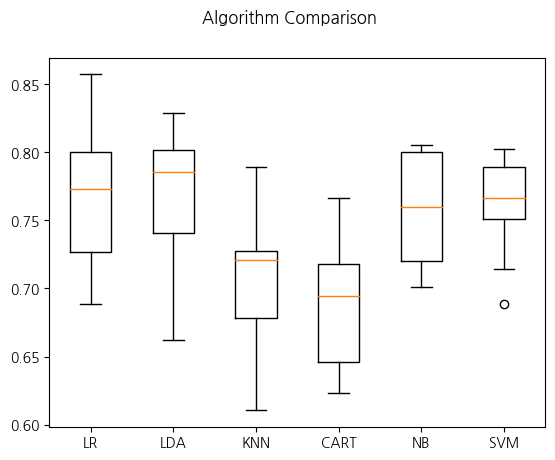

In [69]:
# prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10, random_state=7, shuffle=True)
	cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### 9. 머신러닝 모형 분석에서 파이프라인(pipeline)

## 9. 머신러닝 모형 분석에서 파이프라인(pipeline)

In [70]:
# 파이프파인 생성
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('lda', LinearDiscriminantAnalysis()))
model = Pipeline(estimators)

# 모형의 평가
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.7669685577580315


In [71]:
# 변수선정
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)

# 파이프파인 생성
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression(solver='liblinear')))
model = Pipeline(estimators)

# 모형의 평가
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.7721633629528366


### 10. 앙상블 모형 

#### 1) 배깅 결정 트리 

In [72]:
filename = "./Data/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)

# separate array into input and output components
df_array = data.values
X = df_array[:,0:8]
y = df_array[:,8]

kfold = KFold(n_splits=10, random_state=12345, shuffle=True)

In [73]:
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(estimator=cart, n_estimators=num_trees, random_state=12345)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.7669172932330827


#### 2) 랜덤 포레스트

In [74]:
num_trees = 100
max_features = 3
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())


0.7668831168831168


In [75]:
num_trees = 100
max_features = 7
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.7733595352016406


#### 3)  엑스트라 트리

In [76]:
num_trees = 100
max_features = 7
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.7603212576896787


### 다. 부스팅

In [77]:
num_trees = 30
model = AdaBoostClassifier(n_estimators=num_trees, random_state=12345)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.7485987696514013


In [78]:
num_trees = 100
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=12345)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.7603041695146958


### 라. 보팅 앙상블

In [79]:
# create the sub models
estimators = []
model1 = LogisticRegression(solver='liblinear')
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC(gamma='auto')
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, y, cv=kfold)
print(results.mean())


0.7278195488721806


### 11. 머신러닝 모형의 튜닝(Tuning)

In [80]:
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = RidgeClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid.fit(X, y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.7708333333333334
1.0


In [81]:
param_grid = {'alpha': uniform()}
model = RidgeClassifier()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=3, random_state=7)
rsearch.fit(X, y)
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)


0.7708333333333334
0.07630828937395717


### 12. 최종 모형의 저장과 재사용

In [82]:
filename = './Data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
y = array[:,8]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

# Fit the model on 33%
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# save the model to disk
filename1 = './Model/finalized_model1.sav'
dump(model, open(filename1, 'wb'))

In [83]:
# load the model from disk
loaded_model = load(open(filename1, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7559055118110236
